In [2]:
rm(list=ls())
library(car)
library(bestglm)
library(leaps)
setwd("D:/2019 Fall/STAT 628/module 2")
data = read.csv("data.cleaned.csv")[,-1]
m = lm(data$DENSITY~.,data)
cat("The maximum vif value of design matrix X is: ",max(vif(m)),sep="")
mat = as.matrix(data[-1])
cat("\n The k condition number of design matrix X is: ",max(eigen(t(mat)%*%mat)$values)/min(eigen(t(mat)%*%mat)$values),sep="")


The maximum vif value of design matrix X is: 124.5388
 The k condition number of design matrix X is: 342589.4

### Review of original linear regression model


Call:
lm(formula = DENSITY ~ ., data = data)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0218836 -0.0066880  0.0003936  0.0068992  0.0209215 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.162e+00  9.017e-02  12.882  < 2e-16 ***
AGE         -1.709e-04  7.249e-05  -2.357 0.019235 *  
WEIGHT       2.299e-04  2.519e-04   0.913 0.362245    
HEIGHT      -4.915e-04  1.237e-03  -0.397 0.691474    
ADIPOSITY   -1.399e-03  1.763e-03  -0.794 0.428229    
NECK         9.676e-04  5.265e-04   1.838 0.067361 .  
CHEST        2.781e-04  2.495e-04   1.115 0.266091    
ABDOMEN     -2.034e-03  2.101e-04  -9.684  < 2e-16 ***
HIP          4.673e-04  3.326e-04   1.405 0.161357    
THIGH       -5.124e-04  3.295e-04  -1.555 0.121268    
KNEE         1.106e-04  5.520e-04   0.200 0.841337    
ANKLE       -4.510e-04  5.023e-04  -0.898 0.370188    
BICEPS      -4.042e-04  3.842e-04  -1.052 0.293905    
FOREARM     -6.360e-04  4.663e-04  -1.364 0.1

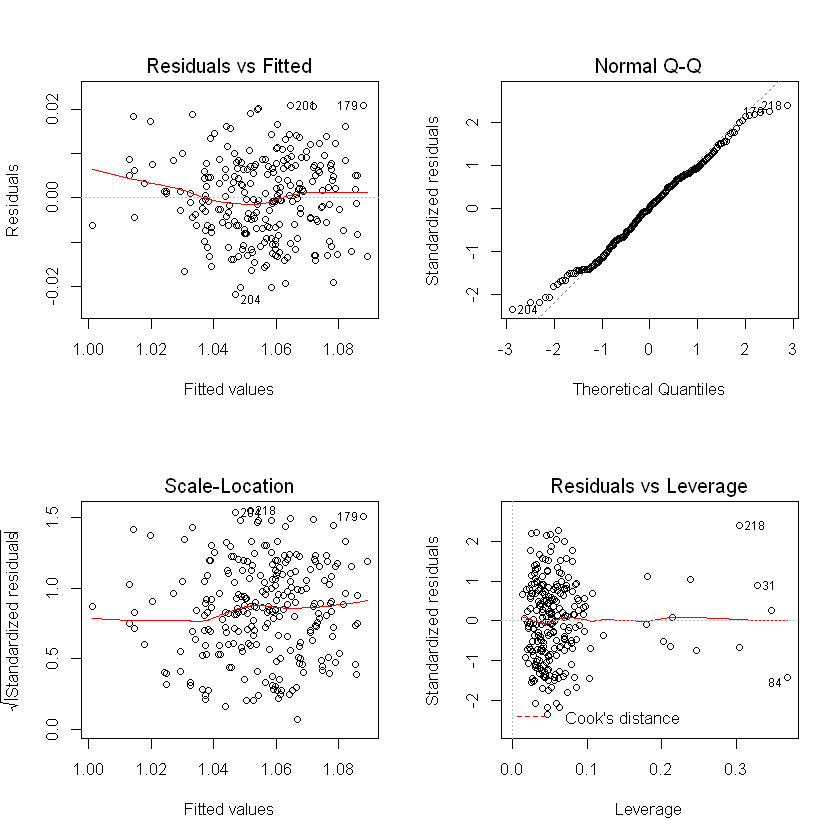

In [4]:
m = lm(DENSITY~.,data)
summary(m)
par(mfrow=c(2,2))
plot(m)

From the summary of the model, it can be seen that there exists some insignificant predictors;

Besides, we will show there is multi-colinearity relationship between design matrix.

#### Colinearity in design matrix

In [5]:
cat("The maximum vif value of design matrix X is: ",max(vif(m)),sep="")
mat = as.matrix(data[-1])
cat("\n The k condition number of design matrix X is: ",max(eigen(t(mat)%*%mat)$values)/min(eigen(t(mat)%*%mat)$values),sep="")

The maximum vif value of design matrix X is: 124.5388
 The k condition number of design matrix X is: 342589.4

Thus, for computational efficiency and multi-colinearity solution, apply step-wise regression with different directions and criteria ti do variables selection.

### Variable selection

In [6]:
n = nrow(data)
set.seed(628)
index = sample(1:n,floor(2*n/3))
train = data[index,]
test = data[-index,]
m = lm(train$DENSITY~.,train)
m.regsub = regsubsets(train$DENSITY~., train, nvmax = ncol(train[,-1]))
train.renamed = cbind(train[,-1],train[,1])
names(train.renamed)[ncol(train)] = "DENSITY"

#### AIC criterion

In [7]:
step(m,direction="both",k=2,trace=0)

Start:  AIC=-1522.71
train$DENSITY ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq      RSS     AIC
- WEIGHT     1 0.0000004 0.013509 -1524.7
- BICEPS     1 0.0000031 0.013512 -1524.7
- ADIPOSITY  1 0.0000050 0.013514 -1524.7
- KNEE       1 0.0000138 0.013522 -1524.5
- HEIGHT     1 0.0000176 0.013526 -1524.5
- FOREARM    1 0.0000608 0.013569 -1524.0
- NECK       1 0.0001634 0.013672 -1522.7
<none>                   0.013509 -1522.7
- ANKLE      1 0.0001681 0.013677 -1522.7
- CHEST      1 0.0003117 0.013820 -1521.0
- AGE        1 0.0004697 0.013978 -1519.1
- HIP        1 0.0004800 0.013989 -1519.0
- THIGH      1 0.0006213 0.014130 -1517.3
- WRIST      1 0.0008506 0.014359 -1514.6
- ABDOMEN    1 0.0062414 0.019750 -1462.0

Step:  AIC=-1524.71
train$DENSITY ~ AGE + HEIGHT + ADIPOSITY + NECK + CHEST + ABDOMEN + 
    HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST

            Df S


Call:
lm(formula = train$DENSITY ~ AGE + HEIGHT + CHEST + ABDOMEN + 
    HIP + THIGH + ANKLE + WRIST, data = train)

Coefficients:
(Intercept)          AGE       HEIGHT        CHEST      ABDOMEN          HIP  
  1.0568158   -0.0001900    0.0009715    0.0005219   -0.0021968    0.0008469  
      THIGH        ANKLE        WRIST  
 -0.0010962   -0.0008915    0.0049789  


In [ ]:
step(m,direction="backward",k=2,trace=0)

In [ ]:
step(m,direction="forward",k=2,trace=0)

In [ ]:
best.aic = bestglm(train.renamed, IC = "AIC")$BestModel

#### BIC criterion

In [ ]:
n=nrow(train);p=ncol(train[,-1])

In [ ]:
step(m,direction="both",k=log(n),trace=1)

In [ ]:
step(m,direction="backward",k=log(n),trace=1)

In [ ]:
step(m,direction="forward",k=log(n),trace=1)

In [ ]:
best.bic = bestglm(train.renamed, IC = "BIC")$BestModel

In [ ]:
plot(m.regsub, scale = 'bic')

#### $R^2_{adj}$  criterion

In [ ]:
plot(m.regsub, scale = 'adjr2')

### Models selection